In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import pathlib

from datetime import datetime, time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from ipywidgets import IntProgress
from IPython.display import display
import time


In [2]:
max_count_progress = 100

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/cyto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cyto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
BASE_DIR = pathlib.Path().cwd()

In [6]:
df = pd.read_csv('base_table.csv', parse_dates= ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime'])

Text(0.5, 1.0, 'AST v/s Elite Level Code')

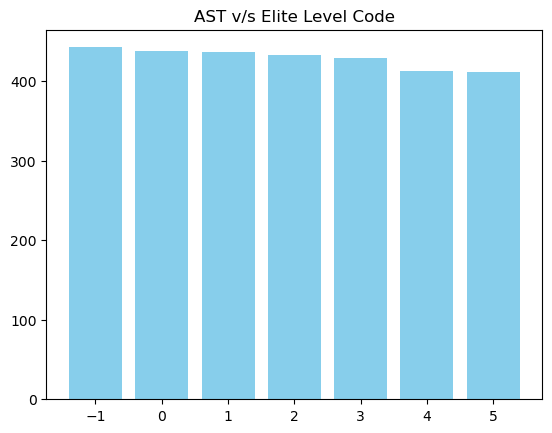

In [7]:
average_ast = df.groupby('elite_level_code')['speed_to_answer'].mean().reset_index()
plt.bar(average_ast['elite_level_code'], average_ast['speed_to_answer'], color='skyblue')
plt.title("AST v/s Elite Level Code")

In [23]:
# now calculate the correlation matrix
correlation_matrix = df_labelencoded[['handle_time', 'speed_to_answer', 'elite_level_code', 'silence_percent_average', 'agent_tone', 'customer_tone']].corr()

correlation_matrix

,handle_time,speed_to_answer,elite_level_code,silence_percent_average,agent_tone,customer_tone
handle_time,1.000000,0.165169,0.034904,0.399125,0.021407,0.000251
speed_to_answer,0.165169,1.000000,-0.043335,-0.012068,-0.034015,-0.000728
elite_level_code,0.034904,-0.043335,1.000000,-0.010261,-0.006949,-0.002757
silence_percent_average,0.399125,-0.012068,-0.010261,1.000000,-0.043926,0.000716
agent_tone,0.021407,-0.034015,-0.006949,-0.043926,1.000000,0.002284
customer_tone,0.000251,-0.000728,-0.002757,0.000716,0.002284,1.000000


# Elite Status Code

## Observations
In the above Graph and Correlation matrix, we can clearly see that - <br>
- As elite level increases, silence should go down at least with some slope, but it barely goes down
- the AST time is not going down sufficiently for elite members
- the AHT time is also not going down - instead it rises


## Sugggestions
- United Airline Agents must be alerted when a registered phone number of an elite member calls and
      thus priority response must be given to reduce AST
- Agents must also be screened on handling the problems as quickly as possible for Elite Members
- The calmest Agents - ie, Agents with the least agent_tone score must be assigned for Elite Members (refer agent_tone_analysis.ipynb)

In [80]:
# Initialize a list to hold all words
all_words = []

# Define a function to preprocess and tokenize the transcripts
def preprocess_transcript(transcript):
    # Convert to lowercase
    transcript = transcript.lower()
    # Remove punctuation
    transcript = transcript.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the transcript
    tokens = word_tokenize(transcript)
    return tokens

# Process each transcript in the DataFrame
total_transcripts = len(df_labelencoded['call_transcript'])
for i, transcript in enumerate(df_labelencoded['call_transcript']):
    tokens = preprocess_transcript(transcript)
    all_words.extend(tokens)
    
    # Print progress
    progress_percentage = (i + 1) / total_transcripts * 100
    print(f'\rProcessing Transcripts: {progress_percentage:.2f}% complete', end='')

# Count the total number of words
total_words = len(all_words)

# Remove stop words for more relevant word counts
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]

# Count the frequency of each word
word_freq = nltk.FreqDist(filtered_words)

# Display results
print(f'Total number of words in all transcripts: {total_words}')
print(f'Word frequency count:\n{word_freq.most_common(100)}')  # Display the 10 most common words

[nltk_data] Downloading package punkt_tab to /home/cyto/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cyto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing Transcripts: 100.00% completeTotal number of words in all transcripts: 35951751
Word frequency count:
[('flight', 629838), ('agent', 554444), ('customer', 545636), ('let', 301864), ('change', 245470), ('im', 237889), ('help', 200997), ('like', 194031), ('thank', 184714), ('would', 176120), ('united', 171993), ('calling', 159962), ('get', 156275), ('typing', 145689), ('next', 142014), ('okay', 138219), ('work', 134041), ('day', 132394), ('take', 131403), ('youre', 128607), ('need', 126264), ('yeah', 122941), ('really', 119975), ('time', 119508), ('thanks', 119487), ('know', 118796), ('chicago', 115015), ('one', 114165), ('call', 113217), ('looks', 112484), ('please', 107511), ('today', 106985), ('look', 106961), ('could', 102295), ('see', 100099), ('fee', 97703), ('reservation', 97645), ('make', 96256), ('travel', 94347), ('good', 93838), ('booked', 92608), ('new', 90384), ('name', 89990), ('airlines', 89222), ('anything', 86991), ('check', 85308), ('understand', 83499), ('pr

In [81]:
unique_words_count = len(word_freq)
print(f'Total number of unique words (excluding stop words): {unique_words_count}')

Total number of unique words (excluding stop words): 51083
